In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture
import os
os.chdir('M:/rahulpython/')
pd.set_option('max.columns',None)
%matplotlib inline

In [2]:
customers_df = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
items_df = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
payments_df = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews_df = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')
product_df = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
cust_order = pd.merge(customers_df, orders_df, on='customer_id')
cust_items = pd.merge(cust_order, items_df, on='order_id')
cust_products = pd.merge(cust_items, product_df, on='product_id')
cust_prodpayments = pd.merge(cust_products, payments_df, on='order_id')
cust_prodreview = pd.merge(cust_prodpayments, reviews_df, on='order_id')

In [10]:
customer_data = cust_prodreview.copy()

In [11]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24


In [12]:
customer_data = customer_data.drop(columns = ['order_id','customer_id','review_comment_title','review_comment_message',
                                                                     'review_creation_date', 'review_answer_timestamp',
                                                                     'review_id','seller_id','product_id',
                                                                     ])

In [13]:
customer_data.shape

(118315, 27)

In [14]:
customer_data['customer_city'] = customer_data['customer_city'].astype('category')
customer_data['customer_state'] = customer_data['customer_state'].astype('category')
customer_data['product_category_name'] = customer_data['product_category_name'].astype('category')
customer_data['payment_type'] = customer_data['payment_type'].astype('category')
customer_data['order_status'] = customer_data['order_status'].astype('category')

In [15]:
scale_num = customer_data[['price', 'freight_value',
       'product_name_lenght','product_weight_g',
       'product_description_lenght', 'product_photos_qty', 
       'product_length_cm', 'product_height_cm', 'product_width_cm','payment_value']].copy()

In [16]:
scale_num.isnull().sum()

price                            0
freight_value                    0
product_name_lenght           1709
product_weight_g                20
product_description_lenght    1709
product_photos_qty            1709
product_length_cm               20
product_height_cm               20
product_width_cm                20
payment_value                    0
dtype: int64

In [17]:
scale_num = scale_num.dropna()

In [18]:
sc = StandardScaler()
sc.fit(scale_num)
norm_var = sc.transform(scale_num)

In [19]:
norm_df = pd.DataFrame(norm_var)

In [20]:
norm_df['customer_city'] = customer_data['customer_city'].astype('category')
norm_df['customer_state'] = customer_data['customer_state'].astype('category')
norm_df['product_category_name'] = customer_data['product_category_name'].astype('category')
norm_df['payment_type'] = customer_data['payment_type'].astype('category')


In [21]:
norm_df.columns = ['price', 'freight_value',
       'product_name_lenght','product_weight_g',
       'product_description_lenght', 'product_photos_qty', 
       'product_length_cm', 'product_height_cm', 
       'product_width_cm','payment_value','customer_city',
       'customer_state','product_category_name','payment_type']

In [22]:
norm_df.head()

,price,freight_value,product_name_lenght,product_weight_g,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,payment_value,customer_city,customer_state,product_category_name,payment_type
0,0.023021,0.114732,-0.774189,1.735848,0.544083,-0.701711,1.459949,3.5144,0.670492,-0.097327,franca,SP,moveis_escritorio,credit_card
1,-0.042262,0.305333,-0.774189,1.735848,0.544083,-0.701711,1.459949,3.5144,0.670492,0.384457,santarem,PA,moveis_escritorio,credit_card
2,-0.042262,0.305333,-0.774189,1.735848,0.544083,-0.701711,1.459949,3.5144,0.670492,0.384457,santarem,PA,moveis_escritorio,credit_card
3,0.023021,-0.280356,-0.774189,1.735848,0.544083,-0.701711,1.459949,3.5144,0.670492,-0.120721,nova santa rita,RS,moveis_escritorio,credit_card
4,-0.074903,0.664447,-0.774189,1.735848,0.544083,-0.701711,1.459949,3.5144,0.670492,-0.132045,mage,RJ,moveis_escritorio,credit_card


In [23]:
norm_df = norm_df.dropna()

**K-Modes clustering**

In [24]:
km = KModes(n_clusters=4, init='Huang', n_init=30, verbose=1)

In [25]:
km_pred = km.fit_predict(norm_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45043, cost: 1249754.0
Run 1, iteration: 2/100, moves: 1759, cost: 1249754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29001, cost: 1262215.0
Run 2, iteration: 2/100, moves: 3705, cost: 1262215.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22247, cost: 1264662.0
Run 3, iteration: 2/100, moves: 1615, cost: 1264662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 30331, cost: 1258086.0
Run 4, iteration: 2/100, moves: 1448, cost: 1258086.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26913, cost: 1259360.0
Run 5, iteration: 2/100, moves: 368, cost: 1259360.0
Init: initializing centroids
Init: initializing clusters

In [26]:
label = km.labels_

In [27]:
norm_df['cluster'] = label
norm_df['cluster_name'] = ['cluster1' if x == 0 else\
                           'cluster2' if x == 1 else\
                           'cluster3' if x == 2 else\
                           'cluster4' for x in label]

Text(0.5, 0, '')

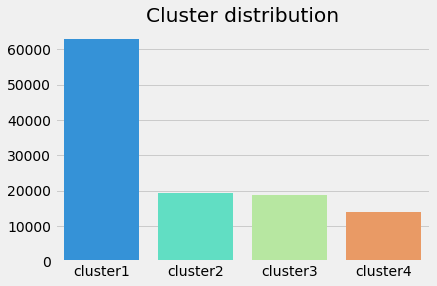

In [28]:
plt.style.use('fivethirtyeight')
sns.countplot(norm_df['cluster_name'],order=norm_df['cluster_name'].value_counts().index,palette = 'rainbow')
plt.title('Cluster distribution')
plt.ylabel(None)
plt.xlabel(None)

In [29]:
cluster_1 = norm_df.loc[norm_df['cluster_name']== 'cluster1']
cluster_2 = norm_df.loc[norm_df['cluster_name']== 'cluster2']
cluster_3 = norm_df.loc[norm_df['cluster_name']== 'cluster3']
cluster_4 = norm_df.loc[norm_df['cluster_name']== 'cluster4']

plot_clus1 = (cluster_1['product_category_name'].value_counts() / len(cluster_1['product_category_name'])).\
sort_values(ascending=True) * 100
plot_clus2 = (cluster_2['product_category_name'].value_counts() / len(cluster_2['product_category_name'])).\
sort_values(ascending=True) * 100
plot_clus3 = (cluster_3['product_category_name'].value_counts() / len(cluster_2['product_category_name'])).\
sort_values(ascending=True) * 100
plot_clus4 = (cluster_4['product_category_name'].value_counts() / len(cluster_4['product_category_name'])).\
sort_values(ascending=True) * 100


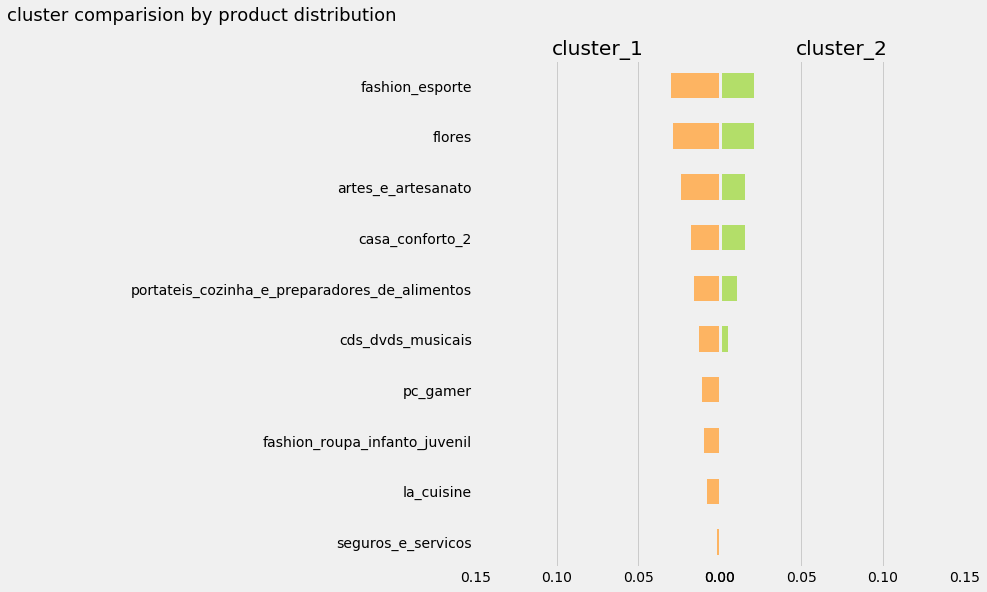

In [44]:
color_pal = sns.color_palette("Set3", 11)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
ax1 = plot_clus1.head(10).plot(kind='barh', figsize=(12, 8), color=color_pal[5], title='cluster_1')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.set_xlim(0,0.15)
ax1.invert_xaxis()
ax1.grid(axis='y')


plt.subplot(1, 2, 2)
ax2 = plot_clus2.head(10).plot(kind='barh', figsize=(12, 8), color=color_pal[6], title='cluster_2')
ax2_y = ax2.get_yaxis()
ax2.grid(axis='y')
ax2_y.set_visible(False)
ax2.set_xlim(0,0.15)


plt.suptitle('cluster comparision by product distribution', fontsize=18, y=1.03, x= 0.1)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

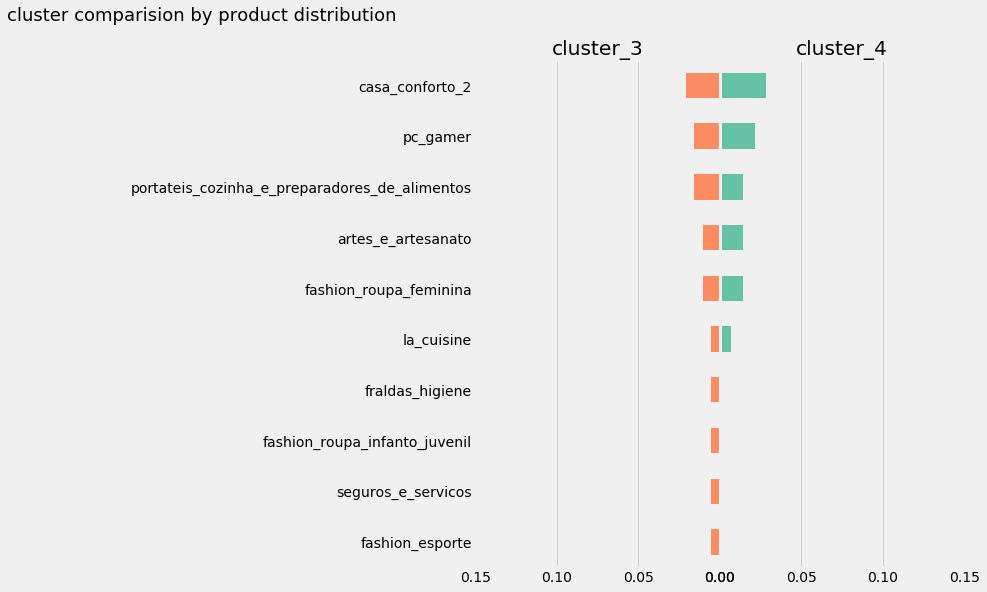

In [45]:
color_pal = sns.color_palette("Set2", 11)

plt.subplot(1, 2, 1)
ax1 = plot_clus3.head(10).plot(kind='barh', figsize=(12, 8), color=color_pal[1], title='cluster_3')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.set_xlim(0,0.15)
ax1.invert_xaxis()
ax1.grid(axis='y')


plt.subplot(1, 2, 2)
ax2 = plot_clus4.head(10).plot(kind='barh', figsize=(12, 8), color=color_pal[0], title='cluster_4')
ax2_y = ax2.get_yaxis()
ax2.grid(axis='y')
ax2_y.set_visible(False)
ax2.set_xlim(0,0.15)


plt.suptitle('cluster comparision by product distribution', fontsize=18, y=1.03, x=0.1)
plt.tight_layout()
plt.subplots_adjust(wspace=0)


**Principle component analysis**

In [32]:
comp = PCA(n_components=2)
comp.fit(norm_var)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
comp.explained_variance_ratio_

array([0.3184209 , 0.14805928])

In [34]:
pca = comp.transform(norm_var)

In [35]:
components = pd.DataFrame(comp.components_, columns = scale_num.columns, index=[1, 2])
components

,price,freight_value,product_name_lenght,product_weight_g,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,payment_value
1,0.364156,0.423004,0.031508,0.466495,0.095626,0.028912,0.320536,0.346138,0.343180,0.345745
2,0.480599,0.017017,0.039500,-0.198058,0.408339,0.134557,-0.370754,-0.115696,-0.407041,0.475999


**K-Means clustering**

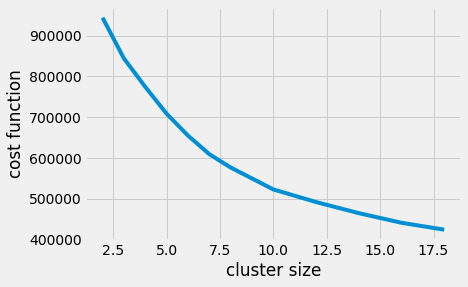

In [36]:
plt.style.use('fivethirtyeight')
k = [2,3,4,5,6,7,8,10,12,14,16,18]
ws = []
for i in k:
    km_sc = KMeans(n_clusters=i).fit(norm_var)
    ws.append(km_sc.inertia_)
plt.plot(k,ws)
plt.xlabel('cluster size')
plt.ylabel('cost function')
plt.show()

In [37]:
km2 = KMeans(n_clusters=4)
km2.fit(norm_var)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

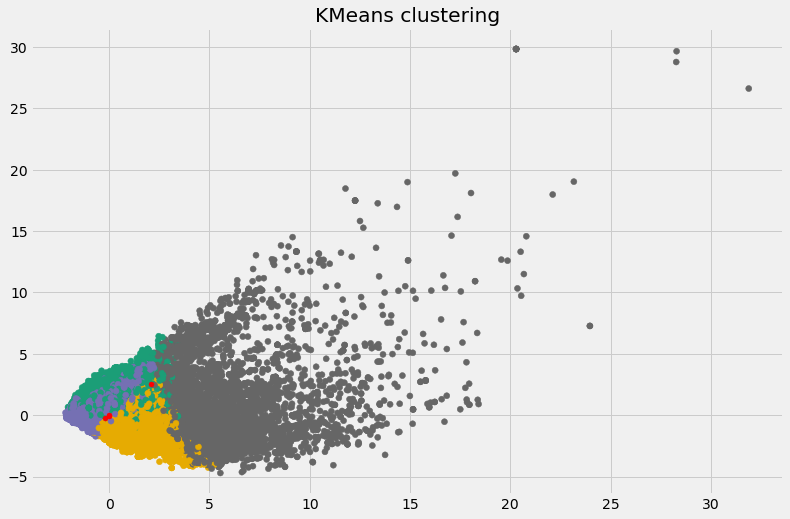

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(pca[:, 0], pca[:, 1], c=km2.labels_,cmap='Dark2')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],s=25,c='red')
plt.title('KMeans clustering')
plt.show()

**Gaussian Mixture clustering**

In [39]:
gm = GaussianMixture(n_components=4)
gm_l = gm.fit(norm_var).predict(norm_var)

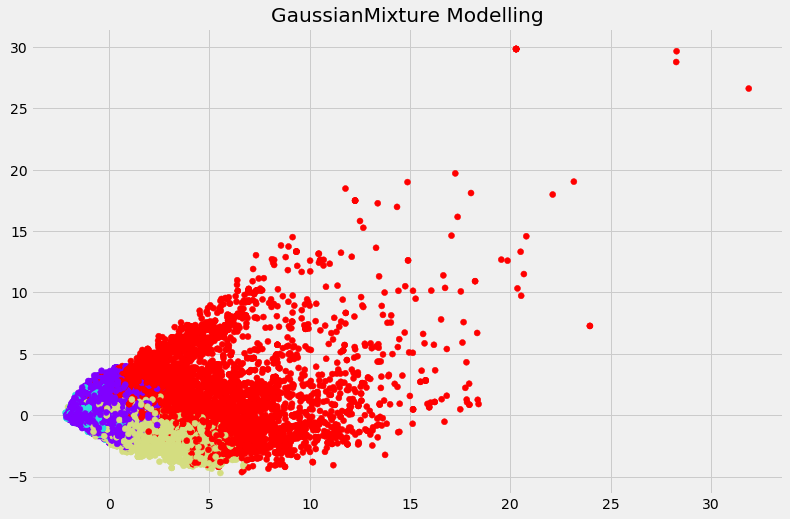

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(pca[:, 0], pca[:, 1], c=gm_l,cmap='rainbow')
plt.title('GaussianMixture Modelling')
plt.show()

**Observation And Findings**

1). Kmodes clustering was used to segment data with products association in each cluster.  
    from the data it is visible that specific clusters with different proportions of buying   
    behaviour.These clusters along with geocodes and store locations can be used to optimize  
    product and customer targeting.  
    
2). Kmeans clustering with 4 clusters were formed,product dimensions and monetary variables  
    were used to segment the clusters.The clusters have centroids close to one another and  
    there is a major cluster and remaining 3 minor clusters with overlapping dimensions.  
    Guassian mixture modelling also cameup with a major cluster.    
    
3). Improved clustering results can be achieved with more data or capturing variables with better  
    presentation of data itself.    